In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\ronrn\Desktop\MBA\intro to data science\final project\healthcare-dataset-stroke-data.csv")
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


# explanation

This dataset predicts whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases and smoking status. Each row in the data provides relevant information about the patient.
1. The column "gender" describes the gender of the patient ("Male", "Female" or "Other").
2. The column "age" describes the age of the patient.
3. The column "hypertension" describes if the patient has hypertension (1-yes or 0-no).
4. The column "heart_disease" describes if the patient has a heart disease (1-yes or 0-no).
5. The column "ever_married" describes if the patient has ever been married ("Yes" or "No").
6. The column "work_type" describes the patient's work type ("children", "Govt_job", "Never_worked", "Private" or "Self-employed").
7. The column "Residence_type" describes the patient's residence type ("Rural" or "Urban").
8. The column "avg_glucose_level" describes patient's average glucose level in blood.
9. The column "bmi" describes patient's body mass index.
10. The column "smoking_status" describes patient's smoking status ("formerly smoked", "never smoked", "smokes" or "Unknown").
11. The column "stroke" describes if the patient had a stroke (1-yes or 0-no).

The "stroke" column is the prediction result - we want to see how the different parameters infect on the chances of the patient to get a stroke.

In [3]:
df.describe() #shows only numerical features

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We can notice that the "bmi" column (body mass index) is the only one that have missing values - out of 5110 patients, it contains only 4909 values.
the avarage bmi is 28.9, and the standard deviation is 7.85 - means that most of the patients have bmi in the range of 21-37.
the minimum value of bmi is 10.3 and the maximum is 97.6.
we can see that 25% of the patients have bmi of less than 23.5, 50% have bmi of less than 28.1 and 75% have bmi of less than 33.1.

# 1 null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.isna().any() #shows the columns that have missing values

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

we can see that the only parameter that contains null values is "bmi" - out of 5110 values, there are 201 which are null values.
In order to deal with that problem - I will calculate the mean of the "bmi" parameter, and fill the null values with the mean value.
Because it is artificially generated, it means that the data will not be accurate.

## 1.1 bmi

In [6]:
df.bmi.mean() #calculate the mean of "bmi"

28.89323691179468

In [7]:
#fill the null values with the mean value of "bmi", by using another column to indicate this value is artificial
df['bmi_available'] = ~df['bmi'].isnull()
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [8]:
df.bmi.isna().any() #check that there are no null values left in "bmi"

False

In [9]:
df.info() #check that all the columns are filled with values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  bmi_available      5110 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 444.3+ KB


# 2 EDA

The question I would like to explore is - what kind of patients get a stroke?

In [10]:
df.stroke.value_counts() #how mamy patients had stroke

0    4861
1     249
Name: stroke, dtype: int64

In [11]:
df.stroke.value_counts(normalize=True) #the precentage of patients who had stroke

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In this dataset - 95.13% of the patients had no stroke, and 4.87% of the patients had stroke.

## 2.1 stroke and gender

In [12]:
df.gender.value_counts(normalize=True) #the precentage of patients by gender

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [13]:
df.stroke.groupby(df.gender).mean() #the precentage of patients who had stroke by gender

gender
Female    0.047094
Male      0.051064
Other     0.000000
Name: stroke, dtype: float64

In [14]:
df.groupby(["gender", "stroke"])["stroke"].count() #the number of patients who had stroke by gender

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

Text(0.5, 0, 'gender')

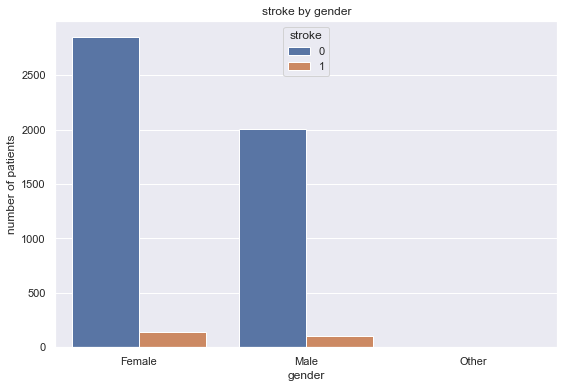

In [15]:
#visualization of the stoke distribution by gender
plt.figure(figsize=(9,6))
sns.countplot("gender", hue="stroke", data=df)
plt.title("stroke by gender")
plt.ylabel("number of patients")
plt.xlabel("gender")

Text(0.5, 0, 'gender')

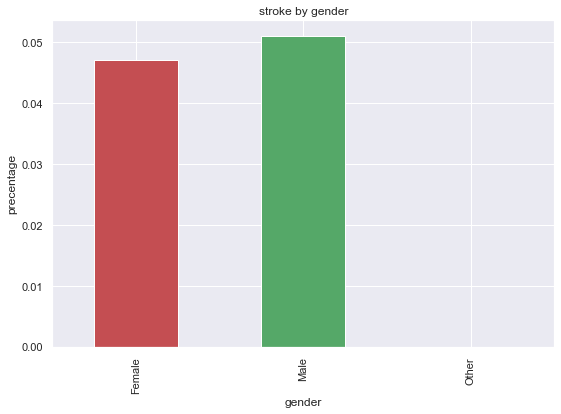

In [16]:
#visualization of patients who had stroke by gender
plt.figure(figsize=(9,6))
fig = df.stroke.groupby(df.gender).mean().plot(kind="bar", color=list("rgb"))
plt.title("stroke by gender")
plt.ylabel("precentage")
plt.xlabel("gender")

There are more female patients in the dataset and so there are more female who had a stoke, but the precentage of female who had a stroke is lower than the precentage of male who had a stroke.

Out of the male patients - around 5.1% had stroke, and out of the female patients - around 4.7% had stroke.

Although there is a difference, it is not seems to be a huge difference between male and female.

The conclusion - gender is not that important to predict a stroke.

## 2.2 stroke and age

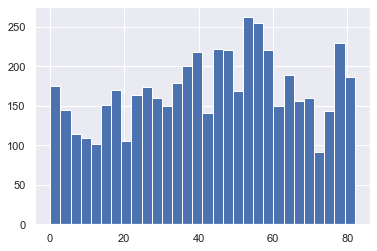

In [17]:
df.age.hist(bins=30) #the distribution of patients by age

Text(0.5, 0, 'age')

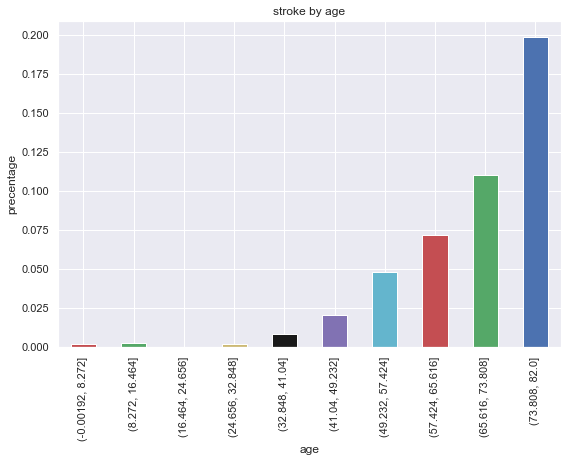

In [18]:
#visualization of patients who had stroke by age
plt.figure(figsize=(9,6))
fig = df["stroke"].groupby(pd.cut(df["age"], 10)).mean().plot(kind="bar", color=list("rgbykmc"))
plt.title("stroke by age")
plt.ylabel("precentage")
plt.xlabel("age")

In [19]:
print('The oldest person who had a stroke was at age:',df.age[df.stroke==1].max())
print('The youngest person who had a stroke was at age:',df.age[df.stroke==1].min())
print('The average age of person who had a stroke:',df.age[df.stroke==1].mean())

The oldest person who had a stroke was at age: 82.0
The youngest person who had a stroke was at age: 1.32
The average age of person who had a stroke: 67.72819277108434


We can see that the distribution of patients by age is pretty equal, but as long as the patient is older - he has more chances to get a stroke.
Because there is a significant correlation between the age and the stroke probability, the conclusion is that age is important to predict a stroke.

## 2.3 stroke and smoking

Text(0.5, 0, 'smoking status')

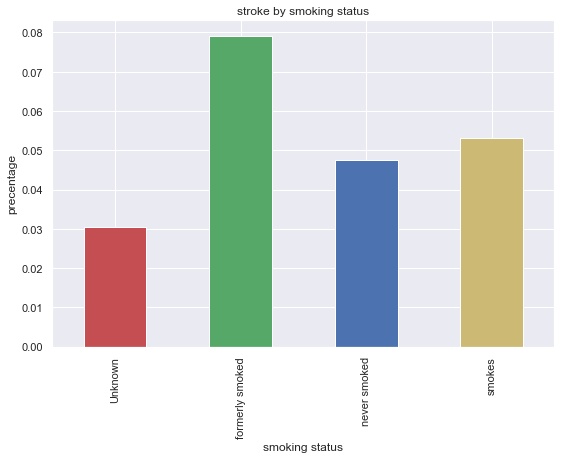

In [20]:
plt.figure(figsize=(9,6))
fig = df.stroke.groupby(df.smoking_status).mean().plot(kind="bar", color=list("rgby"))
plt.title("stroke by smoking status")
plt.ylabel("precentage")
plt.xlabel("smoking status")

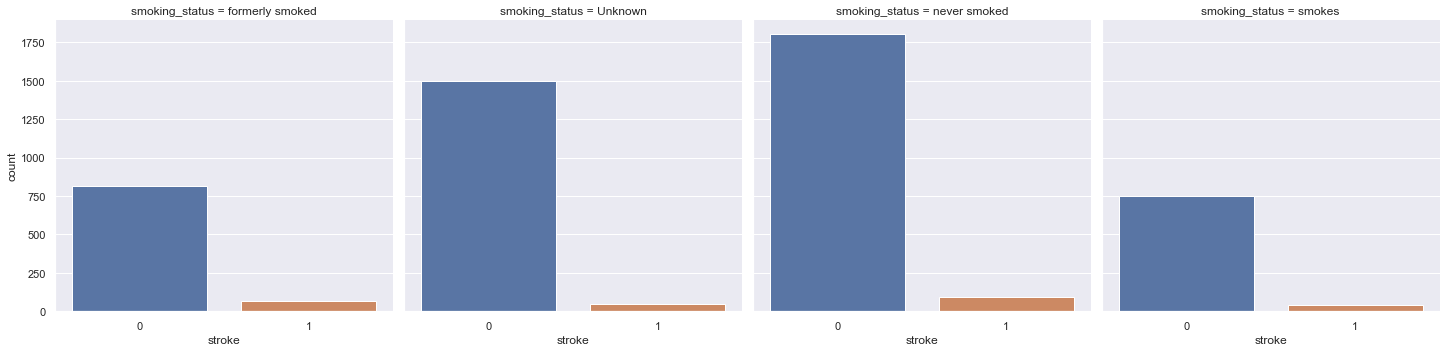

In [21]:
sns.catplot(x='stroke', col='smoking_status', kind='count', data=df)

In [22]:
pd.crosstab(df.smoking_status, df.stroke, margins=True).style.background_gradient(cmap='autumn_r')

stroke,0,1,All
smoking_status,,,
Unknown,1497,47,1544
formerly smoked,815,70,885
never smoked,1802,90,1892
smokes,747,42,789
All,4861,249,5110


In [23]:
print("% of patients who had a stroke") 
print("formerly smoked: ", df.stroke[df.smoking_status == "formerly smoked"].sum()/df[df.smoking_status == "formerly smoked"].stroke.count())
print("never smoked: ", df.stroke[df.smoking_status == "never smoked"].sum()/df[df.smoking_status == "never smoked"].stroke.count())
print("smokes: ", df.stroke[df.smoking_status == "smokes"].sum()/df[df.smoking_status == "smokes"].stroke.count())

% of patients who had a stroke
formerly smoked:  0.07909604519774012
never smoked:  0.04756871035940803
smokes:  0.053231939163498096


we can see that the highest number of those who had stroke are patients who never smoked, but they are also the hightest portion of the patients.
The precentage of the patients who never smoked and had a stroke is lower than those who formerly smoked and the smokers who had a stroke.

The conclusion is that there is a correlation between smoking and having a stroke, but it is not significant and we also have a lot of patiants that their smoking status is unknown, so it is hard to get to an unambiguous conclusion.

## 2.4 precentage smoking and gender

In [24]:
pd.crosstab([df.gender,df.stroke],df.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\ronrn\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


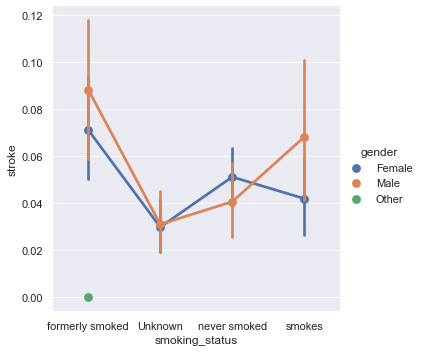

In [25]:
sns.factorplot('smoking_status', 'stroke', hue='gender', data=df)

We can see that in general the smokes and the formerly smoked have higher chance to get a stroke, but it is more significant with males.
Women seems to have more equal distribution by smoking status than man - the precentage of men who smokes or formerly smoked and had a stroke is almost twice more than those who never smoked.
But the precentage of women who smokes or formerly smoked and had a stroke is just slightly higher than those who never smoked.

## 2.5 stroke and residence type 

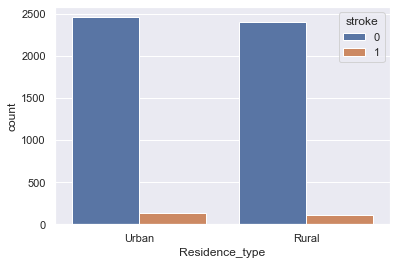

In [26]:
sns.countplot("Residence_type",hue="stroke",data=df)

Text(0, 0.5, 'precentage')

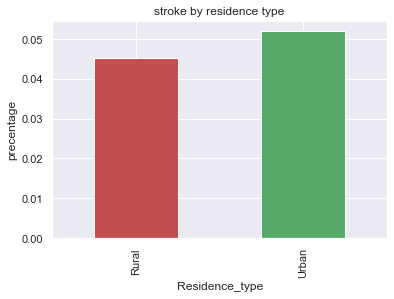

In [27]:
df['stroke'].groupby(df['Residence_type']).mean().plot(kind='bar',color=list('rgbkymc'))
plt.title("stroke by residence type")
plt.ylabel("precentage")

In [28]:
pd.crosstab(df.Residence_type, df.stroke, margins=True).style.background_gradient(cmap='autumn_r')

stroke,0,1,All
Residence_type,,,
Rural,2400,114,2514
Urban,2461,135,2596
All,4861,249,5110


We see that there is slightly higher precentage of urban residents who had stroke than the rural residents - out of the urban residents around 5% had a stroke, and out of the rural residents around 4.5% had a stroke.
Because it is not a significant difference, we can conclude that the residence type is not very important to predict a stroke.

## 2.6 stroke and marriage

In [29]:
pd.crosstab(df.ever_married,df.stroke).style.background_gradient('summer_r')

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


Text(0.5, 0, 'married')

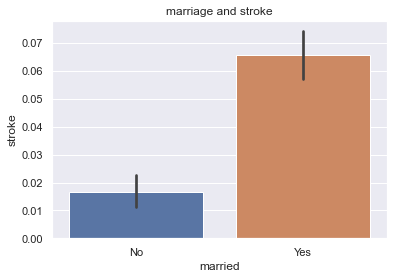

In [30]:
sns.barplot('ever_married','stroke', data=df)
plt.title("marriage and stroke")
plt.xlabel("married")

We can see a significant correlation between the marriage status and the stroke probability.
out of the non married - only around 1.5% had a stroke, but out of the married - around 6.5% had a stroke.

Although there is a significant differance between the two groups - we can assume that the age is also a factor here - the data include a portion of patients who are children (and hence they are not married), and we already know that young people have very small chance to get a stroke.

So we can conclude that the marriage is important but the age factor also should be considered.

## 2.7 stroke and marriage, age

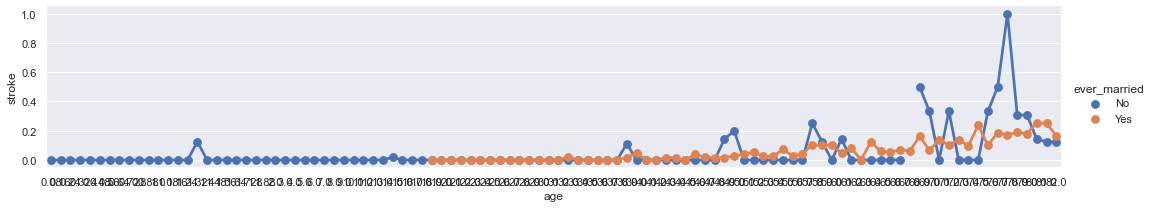

In [31]:
sns.catplot(x='age', y='stroke', hue='ever_married', kind='point', data=df, height=3, aspect=5, ci=0)

We can see that as long as the patient is older, he has a bigger chance to get a stroke, regardless if he is married or not.
We can even see that the old and non married patients have a little more chance to have a stroke that the old and married.

So the conclution is that the fact that there are more precentage of married patients who had stroke, is because the married patients are older than the non married. Hence the age is a significant factor if we check the marriage influance on stroke.

## EDA Conclusion

The conclusion is that among the different parameters we checked - the age of the patient is the most important thing that can predict his or her chance to get a stroke - as long as the patient is older, the chances to get a stroke are rising.

There are also some other parameters that can predict a stroke, but they are less significant:
1. male have more chances to get a stroke than female.
2. urban residents have more chances to get a stroke than rural residents.
3. smokers or formerly smokers have more chances to get a stroke than non smokers.
4. married people have more chances to get a stroke than non married people.

# 3 feature engineering

## 3.1 underlying conditions

In [32]:
df["underlying_conditions"] = df["hypertension"] + df["heart_disease"]
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_available,underlying_conditions
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0,False,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0,True,0


Text(0.5, 0, 'underlying conditions')

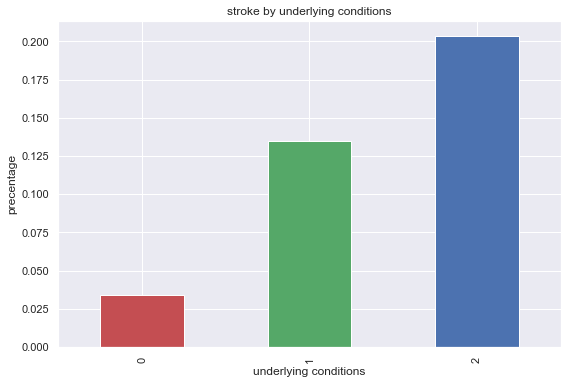

In [33]:
#visualization of patients who had stroke by underlying conditions
plt.figure(figsize=(9,6))
fig = df.stroke.groupby(df.underlying_conditions).mean().plot(kind="bar", color=list("rgb"))
plt.title("stroke by underlying conditions")
plt.ylabel("precentage")
plt.xlabel("underlying conditions")

We see a significant difference between people without underlying conditions and people with underlying conditions - as long as the patient has more underlying conditions he has more chance to get a stroke.

Those who have 2 underlying conditions (hypertension and heart disease) - are with 20% chance to get a stroke.
Those who have 1 underlying condition (either hypertension or heart disease) - are with 13% to get a stroke.
Those who have no underlying condition - are with only 3% to get a stroke.

The conclusion - underlying conditions are very important to predict a stroke.

## 3.2 type of employment

In [34]:
type_map={"Govt_job":"salaried employee",
         "Private":"salaried employee",
         "Self-employed":"self employeed"}

df["type_of_employment"] = df["work_type"].map(type_map)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_available,underlying_conditions,type_of_employment
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0,False,0,salaried employee
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0,True,0,NaN


Text(0.5, 0, 'type of employment')

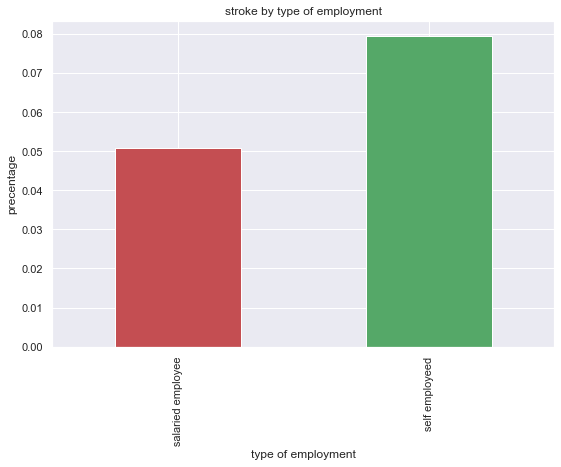

In [35]:
plt.figure(figsize=(9,6))
fig = df["stroke"].groupby(df["type_of_employment"]).mean().plot(kind="bar", color=list("rg"))
plt.title("stroke by type of employment")
plt.ylabel("precentage")
plt.xlabel("type of employment")

We can see that the precentage of people who were self employeed and had a stroke is a little higher than those who were salaried employeed.

Out of those who were salaried employeed - 5% had a stroke, and out of those who were self employeed - 8% had a stroke.

The conclusion - the type of employment (self or salaried), might be considered to predict a stroke, but it is not crucial.

## 3.3 children and adults

In [37]:
# In order to determine weather the patient is child or adult, we will enter his age by using class.
class patient:
    def __init__(self, age):
        self.age = age
    def child_adult(self):
        if self.age <= 18:
            return 'child'
        if self.age > 18:
            return 'adult'
age = int(input('Age of the patient: '))
patient1 = patient(age)
patient1.child_adult()

Age of the patient: 12


'child'

In [38]:
df["children"] = df["age"] <= 18
df["adults"] = df["age"] > 18
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_available,underlying_conditions,type_of_employment,children,adults
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0,False,0,salaried employee,True,False
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0,True,0,NaN,True,False


Text(0.5, 0, 'children')

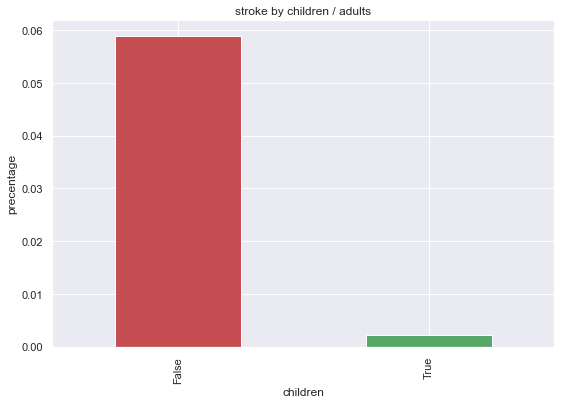

In [39]:
plt.figure(figsize=(9,6))
fig = df["stroke"].groupby(df["children"]).mean().plot(kind="bar", color=list("rg"))
plt.title("stroke by children / adults")
plt.ylabel("precentage")
plt.xlabel("children")

We can see that among the children there are around 0.1% who had a stroke, and among the adults there are almost 6% who had a stroke.
It means that adults are in much higher risk to get a stroke, while children almost don't get a stroke at all.

## feature engineering Conclusion

As we saw, there are two features that can indicate very well weather the patient is at risk to get a stroke or not - underlying conditions and weather he is a child.
we saw a significant corralation between the underling conditions and the probability to get a stroke. we also saw a huge differance between the adults and the children in their probability to get a stroke.

Another feature that can indicate weather the patient is likely to get a stroke is his type of employment - if he is felf amployed his chances to get a stroke are higher than those who are salaried employeed, although the corralation is not very significant.